In [46]:
# 🏎️ F1 2024 Season Analysis

# Introduction

"""
In this project, I explore the 2024 Formula 1 race season using Python and data analysis. 
The goal is to extract insights about driver and constructor performance, race patterns, and more
— and present them visually.
"""



'\nIn this project, I explore the 2024 Formula 1 race season using Python and data analysis. \nThe goal is to extract insights about driver and constructor performance, race patterns, and more\n— and present them visually.\n'

In [47]:
# Step 1 - Importing and Cleaning

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [49]:
df = pd.read_csv('f1.csv')

In [50]:
df.head()

,Track,Position,No,Driver,Team,Starting Grid,Laps,Time/Retired,Points,Set Fastest Lap,Fastest Lap Time
0,Bahrain,1,1,Max Verstappen,Red Bull Racing Honda RBPT,1,57,1:31:44.742,26,Yes,1:32.608
1,Bahrain,2,11,Sergio Perez,Red Bull Racing Honda RBPT,5,57,+22.457,18,No,1:34.364
2,Bahrain,3,55,Carlos Sainz,Ferrari,4,57,+25.110,15,No,1:34.507
3,Bahrain,4,16,Charles Leclerc,Ferrari,2,57,+39.669,12,No,1:34.090
4,Bahrain,5,63,George Russell,Mercedes,3,57,+46.788,10,No,1:35.065


In [51]:
# There are no duplicated values in this dataset.

In [52]:
df.duplicated().sum()

0

In [53]:
# There seem to be a few null values in the column 'Fastest Lap Time', which can be removed.

In [54]:
df.isnull().sum()

Track                0
Position             0
No                   0
Driver               0
Team                 0
Starting Grid        0
Laps                 0
Time/Retired         0
Points               0
Set Fastest Lap      0
Fastest Lap Time    16
dtype: int64

In [55]:
print(df.columns)

Index(['Track', 'Position', 'No', 'Driver', 'Team', 'Starting Grid', 'Laps',
       'Time/Retired', 'Points', 'Set Fastest Lap', 'Fastest Lap Time'],
      dtype='object')


In [56]:
## 🔍 Exploratory Data Analysis (EDA)
##  Let's understand driver, constructor, and race trends.


In [57]:
driver_points = df.groupby('Driver', as_index=False)[['Points']].sum()
driver_points = driver_points.sort_values(by='Points', ascending=False)


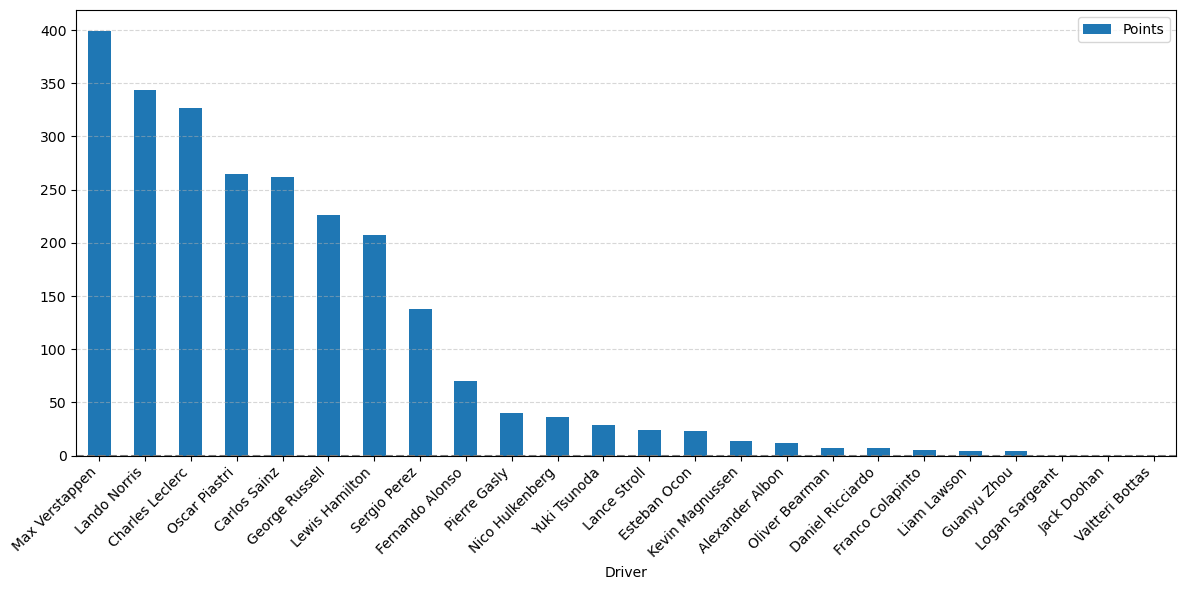

In [58]:
# Building a bar chart to represent the driver who scored the most points accross all races

driver_points.plot(x='Driver', y='Points', kind='bar', figsize=(12,6))
plt.xticks(rotation=45, ha='right')
plt.axhline(0, color='gray', linestyle='--')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()

### 1. Total Points by Driver

The chart above shows the total points accumulated by each driver, including backup drivers, during the 2024 F1 season.

🔍 **Observations:**
1. **Max Verstappen** dominated the season, securing the highest number of points by a significant margin.
2. **Lando Norris** and **Charles Leclerc** were closely matched in the fight for second place, with Norris ultimately edging ahead.
3. The remaining top positions were primarily occupied by drivers from the leading teams, reflecting a strong correlation between team performance and driver points.

💡 **Conclusion:**
The points distribution reveals a clear hierarchy in driver performance throughout the season, with Verstappen clearly in a league of his own, followed by a tight battle in the upper midfield.


In [59]:
# Building a bar chart to represent the team who scored the most points accross all races

constructor_points = df.groupby('Team', as_index = False)[['Points']].sum()
constructor_points = constructor_points.sort_values(by='Points', ascending=False)

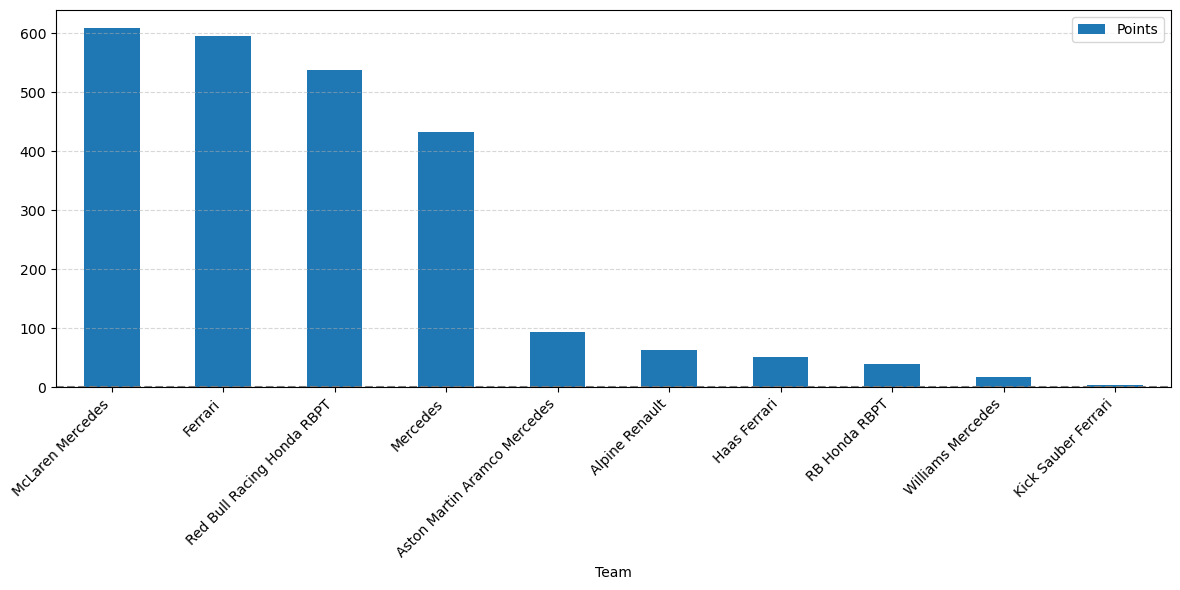

In [60]:
constructor_points.plot(x = 'Team', y = 'Points', kind='bar', figsize=(12,6))
plt.xticks(rotation=45, ha='right')
plt.axhline(0, color='gray', linestyle='--')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()

### 2. Total Points by Team (Constructor Standings)

The plot above shows the total points accumulated by each constructor during the 2024 F1 season.

🔍 **Observations:**

1. 🏆 **McLaren Mercedes** emerged as the Constructor Champions, driven by the consistent performances of both **Lando Norris** and **Oscar Piastri**.
2. Despite **Max Verstappen** winning the Drivers' Championship, **Red Bull** fell short in the Constructors' title due to underperformance by their second driver, **Sergio Pérez**.
3. **Mercedes** secured 4th place with reasonably consistent performances, though still falling below expectations based on their historic success.

💡 **Conclusion:**
This visualization highlights how constructor success relies not only on star drivers but also on strong contributions from both seats. McLaren's dual-driver consistency gave them the edge, while Red Bull’s imbalance proved costly.


In [61]:
# Plot 3 - Driver Consistency

In [62]:
# Convert Position column to numeric (handle 'NC', 'Ret', etc.)
df['Position'] = pd.to_numeric(df['Position'], errors='coerce')

# Group by driver and calculate standard deviation (consistency)
driver_consistency = df.groupby('Driver', as_index=False)['Position'].std()
driver_consistency = driver_consistency.sort_values(by='Position')

In [63]:
driver_consistency

,Driver,Position
6,Franco Colapinto,2.041241
16,Max Verstappen,2.055553
22,Valtteri Bottas,2.063914
3,Daniel Ricciardo,2.516611
18,Oliver Bearman,2.516611
15,Logan Sargeant,2.534609
8,Guanyu Zhou,2.827279
2,Charles Leclerc,2.998682
13,Lewis Hamilton,3.044049
19,Oscar Piastri,3.111165


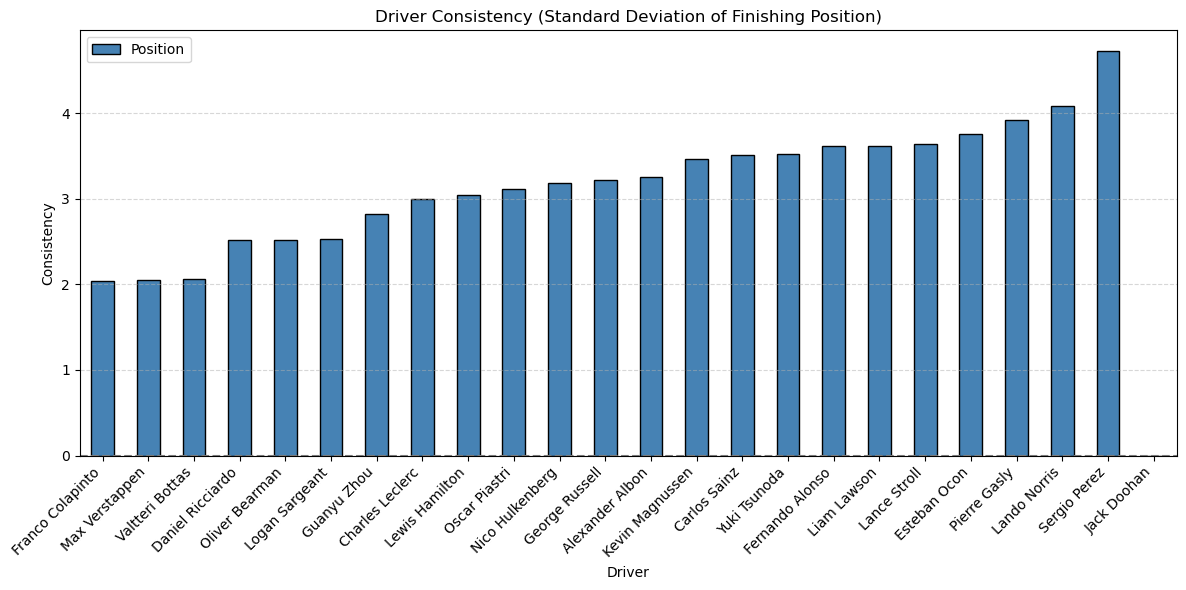

In [64]:

# Plot
driver_consistency.plot(
    x='Driver',
    y='Position',
    kind='bar',
    color='steelblue',
    figsize=(12, 6),
    edgecolor='black'
)
plt.title('Driver Consistency (Standard Deviation of Finishing Position)')
plt.xlabel('Driver')
plt.ylabel('Consistency')
plt.xticks(rotation=45, ha='right')
plt.axhline(0, color='gray', linestyle='--')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()


### 4. Driver Consistency (Standard Deviation of Finishing Position)

This plot shows the standard deviation of each driver’s finishing position across the 2024 season, providing insight into how consistent their performances were from race to race.

🔍 **Observations:**

1. **A lower standard deviation** reflects more consistent finishing positions, while a **higher value** suggests inconsistent performance or large fluctuations in race results.
2. **Franco Colapinto** appears to be the most consistent on paper, but this is likely influenced by his limited number of races after replacing **Logan Sargeant** mid-season.
3. **Max Verstappen** ranks as one of the most consistent drivers, which correlates with his dominant season and high point total.
4. Interestingly, **Valtteri Bottas** also ranks high in consistency, though this reflects **consistently low finishes**, which resulted in **no points scored**.

💡 **Conclusion:**
Consistency is a key factor in championship success. While some drivers were consistently competitive, others maintained lower, but steady, race results — highlighting the importance of both pace and reliability.


In [65]:
# Plot 4 - Grid Gain/Loss

In [66]:
# creating a new column Grid_gain where +ve integers indicate positions gained and -ve numbers indicate positions lost

In [67]:
df['Grid_gain'] = df['Starting Grid'] - df['Position']

In [68]:
df.head()

,Track,Position,No,Driver,Team,Starting Grid,Laps,Time/Retired,Points,Set Fastest Lap,Fastest Lap Time,Grid_gain
0,Bahrain,1.0,1,Max Verstappen,Red Bull Racing Honda RBPT,1,57,1:31:44.742,26,Yes,1:32.608,0.0
1,Bahrain,2.0,11,Sergio Perez,Red Bull Racing Honda RBPT,5,57,+22.457,18,No,1:34.364,3.0
2,Bahrain,3.0,55,Carlos Sainz,Ferrari,4,57,+25.110,15,No,1:34.507,1.0
3,Bahrain,4.0,16,Charles Leclerc,Ferrari,2,57,+39.669,12,No,1:34.090,-2.0
4,Bahrain,5.0,63,George Russell,Mercedes,3,57,+46.788,10,No,1:35.065,-2.0


In [69]:
avg_grid_gain = df.groupby('Driver', as_index=False)['Grid_gain'].mean()


In [70]:

avg_grid_gain = avg_grid_gain.sort_values(by='Grid_gain', ascending=False)


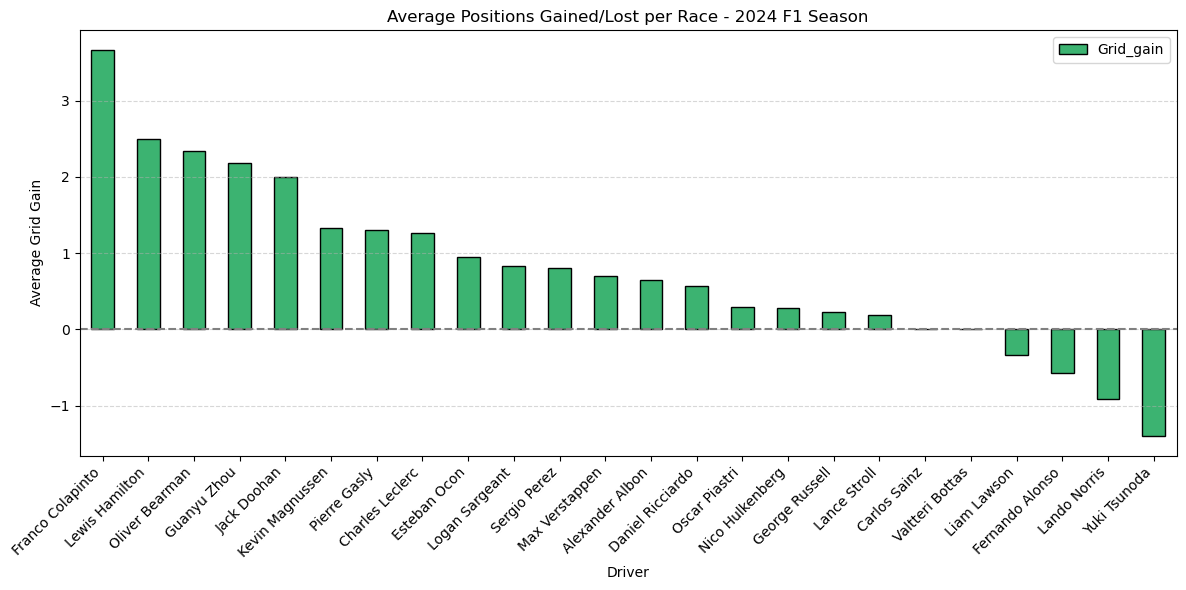

In [71]:

avg_grid_gain.plot(
    kind= 'bar',
    x = 'Driver',
    y = 'Grid_gain',
    figsize=(12,6),
    color='mediumseagreen',
    edgecolor='black'
)

plt.title('Average Positions Gained/Lost per Race - 2024 F1 Season')
plt.xlabel('Driver')
plt.ylabel('Average Grid Gain')
plt.xticks(rotation=45, ha='right')
plt.axhline(0, color='gray', linestyle='--')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()

### 4. Racecraft – Average Grid Gain/Loss

This chart illustrates the average number of positions gained or lost by each driver throughout the 2024 season, comparing their starting grid position to their final race result.

🔍 **Observations:**

1. **Franco Colapinto** achieved the highest average grid gain. Despite joining mid-season as a rookie, he delivered impressive performances in an underperforming car, consistently gaining positions on race day.
2. The **majority of grid gains** came from drivers in the **midfield**, suggesting fierce competition and variability in race outcomes. Notably, **Lewis Hamilton** stood out with the **second-highest average gain**, reflecting his race experience and ability to capitalize on opportunities.
3. Drivers with **negative values**, including both **VCARB drivers**, struggled to maintain or improve their positions, often due to reliability issues or a lack of pace in the car.

💡 **Conclusion:**
This metric highlights not just outright speed, but a driver’s ability to **navigate traffic, manage strategy**, and extract more from race conditions than their qualifying pace might suggest.


In [82]:
df.columns

Index(['Track', 'Position', 'No', 'Driver', 'Team', 'Starting Grid', 'Laps',
       'Time/Retired', 'Points', 'Set Fastest Lap', 'Fastest Lap Time',
       'Grid_gain'],
      dtype='object')

In [72]:
# Plot 5 - Fastest laps by Drivers


In [73]:
df.head()

,Track,Position,No,Driver,Team,Starting Grid,Laps,Time/Retired,Points,Set Fastest Lap,Fastest Lap Time,Grid_gain
0,Bahrain,1.0,1,Max Verstappen,Red Bull Racing Honda RBPT,1,57,1:31:44.742,26,Yes,1:32.608,0.0
1,Bahrain,2.0,11,Sergio Perez,Red Bull Racing Honda RBPT,5,57,+22.457,18,No,1:34.364,3.0
2,Bahrain,3.0,55,Carlos Sainz,Ferrari,4,57,+25.110,15,No,1:34.507,1.0
3,Bahrain,4.0,16,Charles Leclerc,Ferrari,2,57,+39.669,12,No,1:34.090,-2.0
4,Bahrain,5.0,63,George Russell,Mercedes,3,57,+46.788,10,No,1:35.065,-2.0


In [74]:
fastest_laps_only = df[df['Set Fastest Lap']== 'Yes'] 


In [ ]:
fastest_laps_only = df[df['Set Fastest Lap']== 'Yes'] 

fastest_lap_count = fastest_laps_only['Driver'].value_counts()

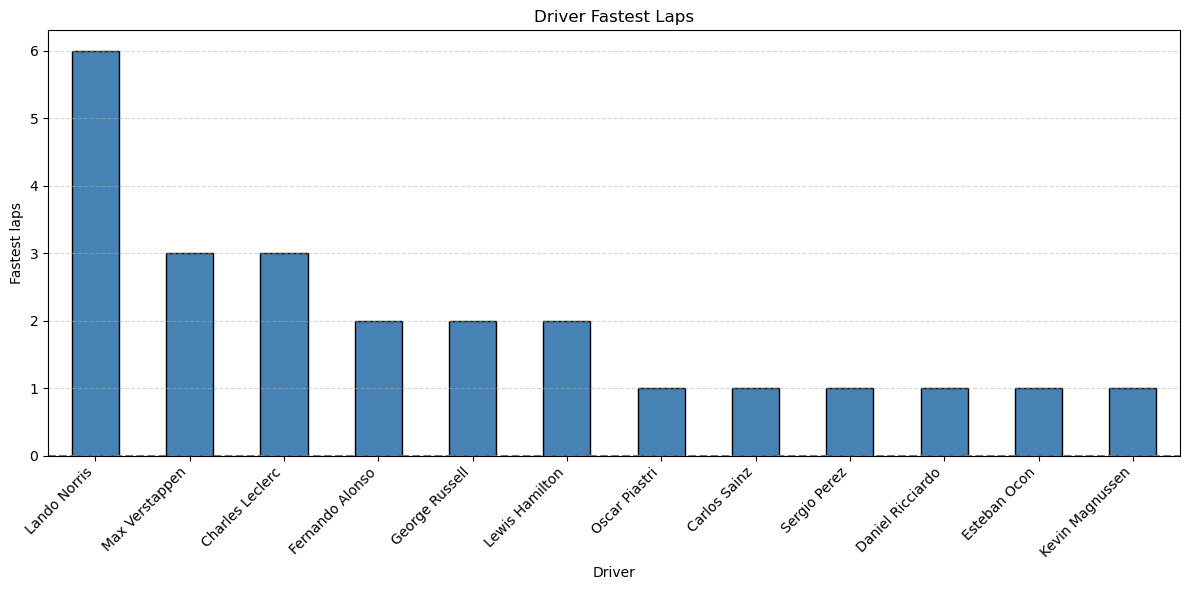

In [ ]:
fastest_laps_only = df[df['Set Fastest Lap']== 'Yes'] 

fastest_lap_count = fastest_laps_only['Driver'].value_counts()
fastest_lap_count.plot(
    kind='bar',
    figsize=(12,6),
    color='steelblue',
    edgecolor='black'
    
)
plt.title("Driver Fastest Laps")
plt.xlabel('Driver')
plt.ylabel('Fastest laps')
plt.xticks(rotation=45, ha='right')
plt.axhline(0, color='gray', linestyle='--')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()


### 6. Fastest Laps by Driver

This plot shows how many times each driver set the fastest lap in a race during the 2024 season — a reflection of raw speed, strategy, and tire management.

🔍 **Observations:**

1. **Lando Norris** set the highest number of fastest laps, which highlights his pace throughout the season. Despite finishing second in the Drivers’ Championship, McLaren’s car only became truly competitive mid-season. If the team maintains that performance level consistently in 2025, Norris could be a serious title contender.
2. **Max Verstappen** and **Charles Leclerc** were close behind, but their seasons tell different stories: Verstappen’s overall dominance contrasts with Ferrari’s erratic performance and strategic missteps, despite strong one-lap pace.
3. It’s notable to see **Fernando Alonso** tied in third for fastest laps, especially given his lower points total — suggesting Aston Martin had flashes of speed but struggled with consistency or execution. The presence of **Russell**, **Hamilton**, and **Piastri** aligns well with broader team trends observed across other metrics.

💡 **Conclusion:**
Fastest laps highlight bursts of top-tier performance, but don’t always correlate with championship position — strategy, reliability, and consistency matter just as much.


In [77]:
# Plot for DNFs

In [78]:
df

,Track,Position,No,Driver,Team,Starting Grid,Laps,Time/Retired,Points,Set Fastest Lap,Fastest Lap Time,Grid_gain
0,Bahrain,1.0,1,Max Verstappen,Red Bull Racing Honda RBPT,1,57,1:31:44.742,26,Yes,1:32.608,0.0
1,Bahrain,2.0,11,Sergio Perez,Red Bull Racing Honda RBPT,5,57,+22.457,18,No,1:34.364,3.0
2,Bahrain,3.0,55,Carlos Sainz,Ferrari,4,57,+25.110,15,No,1:34.507,1.0
3,Bahrain,4.0,16,Charles Leclerc,Ferrari,2,57,+39.669,12,No,1:34.090,-2.0
4,Bahrain,5.0,63,George Russell,Mercedes,3,57,+46.788,10,No,1:35.065,-2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
474,Abu Dhabi,16.0,20,Kevin Magnussen,Haas Ferrari,14,57,+1 lap,0,Yes,1:25.637,-2.0
475,Abu Dhabi,17.0,30,Liam Lawson,RB Honda RBPT,12,55,DNF,0,No,1:28.751,-5.0
476,Abu Dhabi,NaN,77,Valtteri Bottas,Kick Sauber Ferrari,9,30,DNF,0,No,1:29.482,NaN
477,Abu Dhabi,NaN,43,Franco Colapinto,Williams Mercedes,20,26,DNF,0,No,1:29.411,NaN


In [79]:
dnfs = df[df['Time/Retired']== 'DNF'] 


In [ ]:

dnf_count = dnfs['Driver'].value_counts()

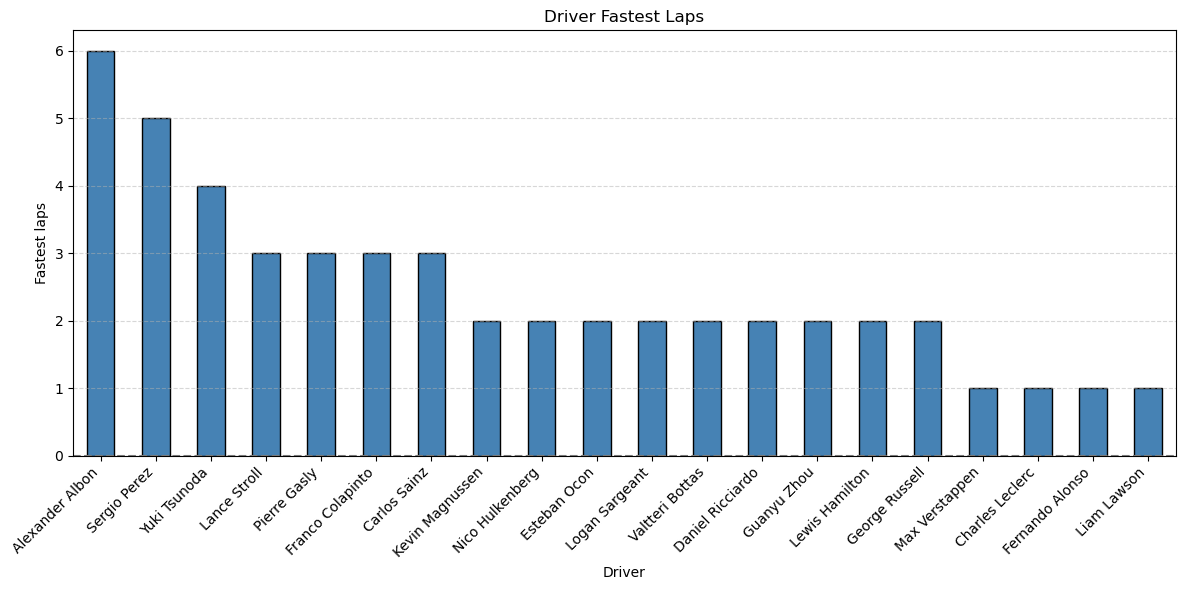

In [ ]:

dnf_count.plot(
    kind = 'bar',
    figsize=(12,6),
    color='steelblue',
    edgecolor='black'
    
)
plt.title("Driver Fastest Laps")
plt.xlabel('Driver')
plt.ylabel('Fastest laps')
plt.xticks(rotation=45, ha='right')
plt.axhline(0, color='gray', linestyle='--')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()


### 7. Total DNFs by Driver

This chart shows how many times each driver failed to finish a race (DNF = Did Not Finish) during the 2024 F1 season. DNFs can result from crashes, mechanical issues, or strategy failures — and they reflect both driver consistency and car reliability.

🔍 **Observations:**

1. **Alex Albon** leads the DNF chart, reflecting Williams' challenging season. As noted by the team principal, the 2024 car was used as a learning platform — prioritizing experimentation over competitiveness. With lessons learned, Williams could potentially fight in the midfield in 2025.
2. **Sergio Perez**’s five DNFs reinforce the struggles he faced all year. Reports indicate that the Red Bull car is highly tailored to Verstappen’s driving style, making it difficult for Perez to extract performance — especially under pressure.
3. **Yuki Tsunoda** ranks closely behind, with DNFs caused by a mix of mechanical failures and on-track mistakes. While his overall pace has improved, reducing errors will be crucial if he hopes to earn a seat with Red Bull's senior team.
4. The rest of the field shows average DNF rates, many influenced by specific high-attrition races (e.g., street circuits or rain-affected Grands Prix), where multiple cars failed to finish.

💡 **Takeaway:** DNFs offer deep insight into both team engineering reliability and driver error margins — both critical in championship contention.
